In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../..')
from src import load_image, ImageQuant2, raw_data_path
%matplotlib widget

In [2]:
# Import cytoplasmic profile
cytbg = np.loadtxt('../../data/calibration_cyt.txt')

# Import embryos dataframe
df = pd.read_csv('../../data/par2_nebd_embryos.csv')

# Select 10 random wild type, C56S and L109R embryos
n = 10
df_wt = df[(df.Line == 'lp637') * (df.RNAi == 'wt')].sample(n)
df_c56s = df[(df.Line == 'nwg240') * (df.RNAi == 'wt')].sample(n)
df_l109r = df[(df.Line == 'nwg338') * (df.RNAi == 'wt')].sample(n)
df_l50r = df[(df.Line == 'nwg400') * (df.RNAi == 'wt')].sample(n)
df_het = df[(df.Line == 'nwg325bal') * (df.RNAi == 'wt')].sample(n)
df_sample = pd.concat([df_wt, df_c56s, df_l109r, df_l50r, df_het])

df_sample.to_csv('../../data/calibration_embryos.csv')

In [3]:
# Import data
df = pd.read_csv('../../data/calibration_embryos.csv')
if raw_data_path:
    df['Path'] = df['Path'].apply(lambda x: raw_data_path + x)
paths_wt = df[df.Line == 'lp637'].Path.to_list()
paths_c56s = df[df.Line == 'nwg240'].Path.to_list()
paths_l109r = df[df.Line == 'nwg338'].Path.to_list()
paths_l50r = df[df.Line == 'nwg400'].Path.to_list()
paths_het = df[df.Line == 'nwg325bal'].Path.to_list()
print(len(paths_wt))

imgs_wt = [load_image(p + '/af_corrected.tif') for p in paths_wt]
imgs_c56s = [load_image(p + '/af_corrected.tif') for p in paths_c56s]
imgs_l109r = [load_image(p + '/af_corrected.tif') for p in paths_l109r]
imgs_l50r = [load_image(p + '/af_corrected.tif') for p in paths_l50r]
imgs_het = [load_image(p + '/af_corrected.tif') for p in paths_het]

rois_wt = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_wt]
rois_c56s = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_c56s]
rois_l109r = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_l109r]
rois_l50r = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_l50r]
rois_het = [np.loadtxt(p + '/ROI_fit.txt') for p in paths_het]

10


In [4]:
# Global calibration parameters
kwargs_dict = {'lr': 0.005, 'descent_steps': 1000}

### Calibration 1 (WT)

  0%|                                                                                                                     | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                             | 1/1000 [00:01<27:26,  1.65s/it]

  1%|▊                                                                                                            | 8/1000 [00:01<02:42,  6.12it/s]

  2%|█▊                                                                                                          | 17/1000 [00:01<01:07, 14.50it/s]

  2%|██▌                                                                                                         | 24/1000 [00:01<00:46, 20.82it/s]

  3%|███▏                                                                                                        | 30/1000 [00:02<00:37, 25.72it/s]

  4%|███▉                                                                                                        | 36/1000 [00:02<00:33, 28.62it/s]

  4%|████▍                                                                                                       | 41/1000 [00:02<00:33, 28.73it/s]

  5%|████▉                                                                                                       | 46/1000 [00:02<00:30, 30.81it/s]

  5%|█████▌                                                                                                      | 52/1000 [00:02<00:25, 36.62it/s]

  6%|██████▌                                                                                                     | 61/1000 [00:02<00:19, 47.76it/s]

  7%|███████▌                                                                                                    | 70/1000 [00:02<00:16, 56.98it/s]

  8%|████████▎                                                                                                   | 77/1000 [00:03<00:16, 56.51it/s]

  8%|█████████                                                                                                   | 84/1000 [00:03<00:17, 52.23it/s]

  9%|█████████▉                                                                                                  | 92/1000 [00:03<00:15, 57.80it/s]

 10%|██████████▋                                                                                                 | 99/1000 [00:03<00:16, 54.32it/s]

 11%|███████████▎                                                                                               | 106/1000 [00:03<00:15, 58.03it/s]

 11%|████████████                                                                                               | 113/1000 [00:03<00:16, 53.97it/s]

 12%|████████████▋                                                                                              | 119/1000 [00:03<00:18, 48.48it/s]

 12%|█████████████▍                                                                                             | 125/1000 [00:03<00:18, 46.06it/s]

 13%|█████████████▉                                                                                             | 130/1000 [00:04<00:19, 44.47it/s]

 14%|██████████████▌                                                                                            | 136/1000 [00:04<00:18, 47.69it/s]

 14%|███████████████▍                                                                                           | 144/1000 [00:04<00:15, 55.16it/s]

 15%|████████████████▎                                                                                          | 153/1000 [00:04<00:13, 62.59it/s]

 16%|█████████████████▎                                                                                         | 162/1000 [00:04<00:12, 68.20it/s]

 17%|██████████████████▎                                                                                        | 171/1000 [00:04<00:11, 72.21it/s]

 18%|███████████████████▏                                                                                       | 179/1000 [00:04<00:14, 57.22it/s]

 19%|███████████████████▉                                                                                       | 186/1000 [00:05<00:14, 54.70it/s]

 19%|████████████████████▌                                                                                      | 192/1000 [00:05<00:17, 45.30it/s]

 20%|█████████████████████▌                                                                                     | 201/1000 [00:05<00:14, 54.11it/s]

 21%|██████████████████████▎                                                                                    | 209/1000 [00:05<00:13, 59.90it/s]

 22%|███████████████████████▎                                                                                   | 218/1000 [00:05<00:11, 65.63it/s]

 23%|████████████████████████▏                                                                                  | 226/1000 [00:05<00:11, 69.09it/s]

 24%|█████████████████████████▏                                                                                 | 235/1000 [00:05<00:10, 73.32it/s]

 24%|██████████████████████████▏                                                                                | 245/1000 [00:05<00:09, 78.85it/s]

 25%|███████████████████████████▏                                                                               | 254/1000 [00:05<00:09, 80.97it/s]

 26%|████████████████████████████▏                                                                              | 264/1000 [00:06<00:08, 83.94it/s]

 27%|█████████████████████████████▏                                                                             | 273/1000 [00:06<00:08, 85.36it/s]

 28%|██████████████████████████████▏                                                                            | 282/1000 [00:06<00:08, 85.15it/s]

 29%|███████████████████████████████▏                                                                           | 291/1000 [00:06<00:08, 83.53it/s]

 30%|████████████████████████████████▍                                                                          | 303/1000 [00:06<00:07, 93.72it/s]

 32%|█████████████████████████████████▌                                                                        | 317/1000 [00:06<00:06, 106.17it/s]

 33%|██████████████████████████████████▊                                                                       | 329/1000 [00:06<00:06, 108.14it/s]

 34%|████████████████████████████████████▎                                                                     | 342/1000 [00:06<00:05, 113.13it/s]

 36%|█████████████████████████████████████▋                                                                    | 355/1000 [00:06<00:05, 116.01it/s]

 37%|███████████████████████████████████████                                                                   | 368/1000 [00:06<00:05, 120.03it/s]

 38%|████████████████████████████████████████▍                                                                 | 381/1000 [00:07<00:05, 117.15it/s]

 39%|█████████████████████████████████████████▊                                                                | 394/1000 [00:07<00:05, 118.89it/s]

 41%|███████████████████████████████████████████                                                               | 406/1000 [00:07<00:05, 116.55it/s]

 42%|████████████████████████████████████████████▎                                                             | 418/1000 [00:07<00:04, 116.50it/s]

 43%|█████████████████████████████████████████████▌                                                            | 430/1000 [00:07<00:04, 115.09it/s]

 44%|██████████████████████████████████████████████▊                                                           | 442/1000 [00:07<00:04, 115.39it/s]

 45%|████████████████████████████████████████████████                                                          | 454/1000 [00:07<00:04, 112.89it/s]

 47%|█████████████████████████████████████████████████▊                                                         | 466/1000 [00:07<00:05, 96.81it/s]

 48%|███████████████████████████████████████████████████                                                        | 477/1000 [00:08<00:06, 78.79it/s]

 49%|████████████████████████████████████████████████████                                                       | 486/1000 [00:08<00:06, 75.96it/s]

 50%|████████████████████████████████████████████████████▉                                                      | 495/1000 [00:08<00:07, 66.36it/s]

 50%|█████████████████████████████████████████████████████▉                                                     | 504/1000 [00:08<00:07, 70.23it/s]

 51%|██████████████████████████████████████████████████████▉                                                    | 513/1000 [00:08<00:06, 74.81it/s]

 52%|████████████████████████████████████████████████████████▏                                                  | 525/1000 [00:08<00:05, 85.02it/s]

 54%|█████████████████████████████████████████████████████████▋                                                 | 539/1000 [00:08<00:04, 98.45it/s]

 55%|██████████████████████████████████████████████████████████▋                                               | 554/1000 [00:08<00:04, 111.32it/s]

 57%|████████████████████████████████████████████████████████████▏                                             | 568/1000 [00:09<00:03, 118.80it/s]

 58%|█████████████████████████████████████████████████████████████▋                                            | 582/1000 [00:09<00:03, 121.28it/s]

 60%|███████████████████████████████████████████████████████████████                                           | 595/1000 [00:09<00:03, 105.39it/s]

 61%|████████████████████████████████████████████████████████████████▉                                          | 607/1000 [00:09<00:04, 87.24it/s]

 62%|██████████████████████████████████████████████████████████████████                                         | 617/1000 [00:09<00:04, 89.28it/s]

 63%|███████████████████████████████████████████████████████████████████▎                                       | 629/1000 [00:09<00:03, 94.71it/s]

 64%|████████████████████████████████████████████████████████████████████▏                                     | 643/1000 [00:09<00:03, 105.85it/s]

 66%|█████████████████████████████████████████████████████████████████████▋                                    | 658/1000 [00:09<00:02, 116.49it/s]

 67%|███████████████████████████████████████████████████████████████████████▏                                  | 671/1000 [00:10<00:02, 117.10it/s]

 68%|█████████████████████████████████████████████████████████████████████████▏                                 | 684/1000 [00:10<00:03, 79.89it/s]

 69%|██████████████████████████████████████████████████████████████████████████▎                                | 694/1000 [00:10<00:04, 68.52it/s]

 70%|███████████████████████████████████████████████████████████████████████████▏                               | 703/1000 [00:10<00:04, 61.11it/s]

 71%|████████████████████████████████████████████████████████████████████████████                               | 711/1000 [00:10<00:05, 55.05it/s]

 72%|█████████████████████████████████████████████████████████████████████████████▏                             | 721/1000 [00:11<00:04, 62.81it/s]

 74%|██████████████████████████████████████████████████████████████████████████████▋                            | 735/1000 [00:11<00:03, 78.45it/s]

 74%|███████████████████████████████████████████████████████████████████████████████▋                           | 745/1000 [00:11<00:03, 74.43it/s]

 75%|████████████████████████████████████████████████████████████████████████████████▋                          | 754/1000 [00:11<00:03, 70.57it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 762/1000 [00:11<00:03, 66.75it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████▌                        | 772/1000 [00:11<00:03, 72.20it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 780/1000 [00:11<00:02, 73.38it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████▎                      | 788/1000 [00:11<00:02, 73.68it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 799/1000 [00:12<00:02, 81.68it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████▊                    | 811/1000 [00:12<00:02, 91.58it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████▍                  | 825/1000 [00:12<00:01, 104.36it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████                 | 840/1000 [00:12<00:01, 115.56it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████▍               | 853/1000 [00:12<00:01, 119.13it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████▉              | 867/1000 [00:12<00:01, 124.23it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████▍            | 881/1000 [00:12<00:00, 127.16it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████▊           | 894/1000 [00:12<00:00, 126.53it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████▏         | 907/1000 [00:12<00:00, 127.25it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████▌        | 920/1000 [00:12<00:00, 128.05it/s]

 94%|███████████████████████████████████████████████████████████████████████████████████████████████████       | 935/1000 [00:13<00:00, 132.10it/s]

 95%|████████████████████████████████████████████████████████████████████████████████████████████████████▌     | 949/1000 [00:13<00:00, 133.41it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████    | 963/1000 [00:13<00:00, 132.27it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▌  | 977/1000 [00:13<00:00, 130.78it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████ | 991/1000 [00:13<00:00, 118.91it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.57it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

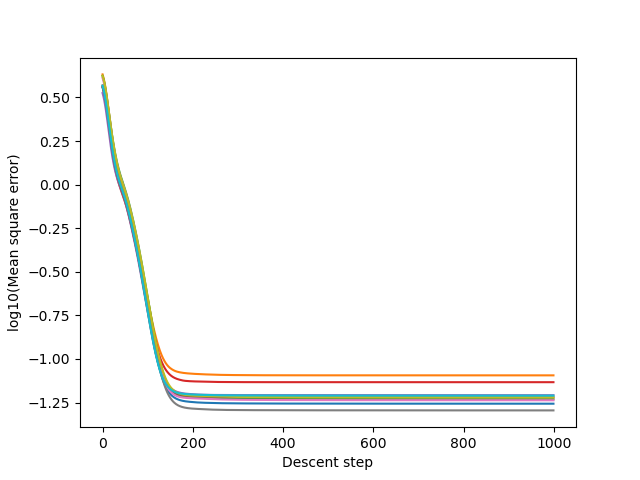

In [5]:
iq1 = ImageQuant2(img=imgs_wt, roi=rois_wt, cytbg=cytbg)
iq1.calibrate_membrane(**kwargs_dict)
iq1.plot_losses(log=True)

### Calibration 2 (C56S)

  0%|                                                                                                                     | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                             | 1/1000 [00:00<08:17,  2.01it/s]

  2%|█▋                                                                                                          | 16/1000 [00:00<00:28, 34.94it/s]

  3%|███▎                                                                                                        | 31/1000 [00:00<00:15, 62.35it/s]

  4%|████▊                                                                                                       | 44/1000 [00:00<00:12, 79.45it/s]

  6%|██████▏                                                                                                     | 57/1000 [00:00<00:10, 92.53it/s]

  7%|███████▌                                                                                                   | 71/1000 [00:01<00:08, 105.58it/s]

  9%|█████████▏                                                                                                 | 86/1000 [00:01<00:07, 117.01it/s]

 10%|██████████▋                                                                                               | 101/1000 [00:01<00:07, 124.82it/s]

 12%|████████████▎                                                                                             | 116/1000 [00:01<00:06, 131.89it/s]

 13%|█████████████▉                                                                                            | 131/1000 [00:01<00:06, 136.16it/s]

 15%|███████████████▍                                                                                          | 146/1000 [00:01<00:06, 131.73it/s]

 16%|████████████████▉                                                                                         | 160/1000 [00:01<00:06, 122.52it/s]

 17%|██████████████████▎                                                                                       | 173/1000 [00:01<00:07, 111.11it/s]

 18%|███████████████████▌                                                                                      | 185/1000 [00:01<00:07, 105.29it/s]

 20%|████████████████████▊                                                                                     | 196/1000 [00:02<00:07, 102.44it/s]

 21%|█████████████████████▉                                                                                    | 207/1000 [00:02<00:07, 100.24it/s]

 22%|███████████████████████▍                                                                                  | 221/1000 [00:02<00:07, 109.87it/s]

 23%|████████████████████████▊                                                                                 | 234/1000 [00:02<00:06, 115.19it/s]

 25%|██████████████████████████▍                                                                               | 249/1000 [00:02<00:06, 124.07it/s]

 26%|███████████████████████████▉                                                                              | 263/1000 [00:02<00:05, 126.46it/s]

 28%|█████████████████████████████▎                                                                            | 276/1000 [00:02<00:05, 121.54it/s]

 29%|██████████████████████████████▋                                                                           | 289/1000 [00:02<00:06, 107.08it/s]

 30%|███████████████████████████████▉                                                                          | 301/1000 [00:02<00:06, 101.03it/s]

 31%|█████████████████████████████████▍                                                                         | 312/1000 [00:03<00:07, 97.21it/s]

 32%|██████████████████████████████████▍                                                                        | 322/1000 [00:03<00:06, 97.51it/s]

 33%|███████████████████████████████████▌                                                                       | 332/1000 [00:03<00:06, 96.44it/s]

 34%|████████████████████████████████████▌                                                                      | 342/1000 [00:03<00:07, 93.64it/s]

 35%|█████████████████████████████████████▋                                                                     | 352/1000 [00:03<00:06, 95.14it/s]

 36%|██████████████████████████████████████▊                                                                    | 363/1000 [00:03<00:06, 97.10it/s]

 37%|███████████████████████████████████████▉                                                                   | 373/1000 [00:03<00:06, 97.03it/s]

 38%|████████████████████████████████████████▉                                                                  | 383/1000 [00:03<00:06, 97.36it/s]

 39%|█████████████████████████████████████████▊                                                                | 394/1000 [00:03<00:06, 100.20it/s]

 40%|██████████████████████████████████████████▉                                                               | 405/1000 [00:04<00:05, 101.31it/s]

 42%|████████████████████████████████████████████                                                              | 416/1000 [00:04<00:05, 100.84it/s]

 43%|█████████████████████████████████████████████▍                                                            | 429/1000 [00:04<00:05, 109.09it/s]

 44%|██████████████████████████████████████████████▉                                                           | 443/1000 [00:04<00:04, 114.52it/s]

 46%|████████████████████████████████████████████████▏                                                         | 455/1000 [00:04<00:05, 102.48it/s]

 47%|█████████████████████████████████████████████████▊                                                         | 466/1000 [00:04<00:05, 98.66it/s]

 48%|██████████████████████████████████████████████████▌                                                       | 477/1000 [00:04<00:05, 101.42it/s]

 49%|███████████████████████████████████████████████████▊                                                      | 489/1000 [00:04<00:04, 106.39it/s]

 50%|█████████████████████████████████████████████████████▍                                                    | 504/1000 [00:04<00:04, 117.47it/s]

 52%|███████████████████████████████████████████████████████                                                   | 520/1000 [00:05<00:03, 127.77it/s]

 53%|████████████████████████████████████████████████████████▍                                                 | 533/1000 [00:05<00:03, 126.71it/s]

 55%|█████████████████████████████████████████████████████████▉                                                | 546/1000 [00:05<00:03, 114.26it/s]

 56%|███████████████████████████████████████████████████████████▏                                              | 558/1000 [00:05<00:04, 102.44it/s]

 57%|████████████████████████████████████████████████████████████▉                                              | 569/1000 [00:05<00:04, 97.67it/s]

 58%|█████████████████████████████████████████████████████████████▋                                            | 582/1000 [00:05<00:03, 104.86it/s]

 60%|███████████████████████████████████████████████████████████████▍                                          | 599/1000 [00:05<00:03, 121.34it/s]

 62%|█████████████████████████████████████████████████████████████████▏                                        | 615/1000 [00:05<00:02, 131.53it/s]

 63%|██████████████████████████████████████████████████████████████████▋                                       | 629/1000 [00:06<00:02, 125.10it/s]

 64%|████████████████████████████████████████████████████████████████████                                      | 642/1000 [00:06<00:03, 116.77it/s]

 66%|█████████████████████████████████████████████████████████████████████▍                                    | 655/1000 [00:06<00:02, 119.58it/s]

 67%|███████████████████████████████████████████████████████████████████████▏                                  | 672/1000 [00:06<00:02, 132.61it/s]

 69%|████████████████████████████████████████████████████████████████████████▋                                 | 686/1000 [00:06<00:02, 134.38it/s]

 70%|██████████████████████████████████████████████████████████████████████████▏                               | 700/1000 [00:06<00:02, 117.11it/s]

 71%|████████████████████████████████████████████████████████████████████████████▎                              | 713/1000 [00:06<00:02, 99.89it/s]

 72%|█████████████████████████████████████████████████████████████████████████████▍                             | 724/1000 [00:06<00:02, 99.95it/s]

 74%|█████████████████████████████████████████████████████████████████████████████▉                            | 735/1000 [00:07<00:02, 100.74it/s]

 75%|███████████████████████████████████████████████████████████████████████████████▊                           | 746/1000 [00:07<00:02, 99.49it/s]

 76%|████████████████████████████████████████████████████████████████████████████████▉                          | 757/1000 [00:07<00:02, 98.84it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 768/1000 [00:07<00:02, 97.21it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████▊                       | 781/1000 [00:07<00:02, 105.58it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████▍                     | 796/1000 [00:07<00:01, 116.95it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████▉                    | 811/1000 [00:07<00:01, 125.31it/s]

 83%|███████████████████████████████████████████████████████████████████████████████████████▌                  | 826/1000 [00:07<00:01, 129.63it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████▏                | 841/1000 [00:07<00:01, 133.54it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████▋               | 856/1000 [00:07<00:01, 137.20it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████▎             | 871/1000 [00:08<00:00, 137.99it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████▊            | 885/1000 [00:08<00:01, 111.62it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████           | 897/1000 [00:08<00:00, 107.91it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████▎         | 909/1000 [00:08<00:00, 105.78it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████▋        | 921/1000 [00:08<00:00, 108.72it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 933/1000 [00:08<00:00, 99.06it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████      | 944/1000 [00:08<00:00, 101.31it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 956/1000 [00:08<00:00, 105.39it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍   | 967/1000 [00:09<00:00, 93.66it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 979/1000 [00:09<00:00, 99.32it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▍| 995/1000 [00:09<00:00, 114.11it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.86it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

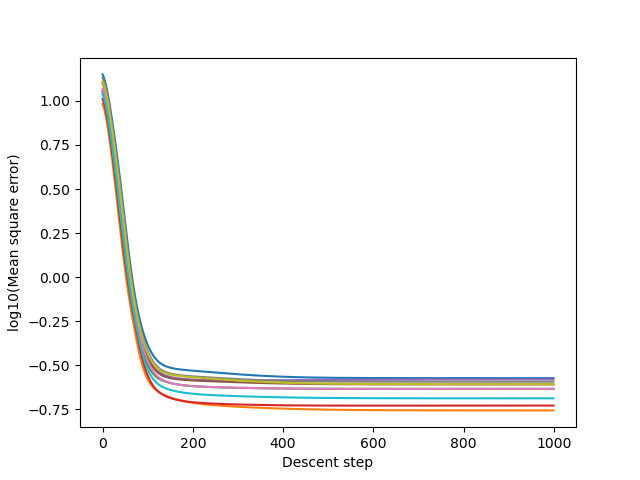

In [6]:
iq2 = ImageQuant2(img=imgs_c56s, roi=rois_c56s, cytbg=cytbg)
iq2.calibrate_membrane(**kwargs_dict)
iq2.plot_losses(log=True)

### Calibration 3 (L109R)

  0%|                                                                                                                     | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                             | 1/1000 [00:00<09:51,  1.69it/s]

  2%|█▋                                                                                                          | 16/1000 [00:00<00:32, 30.49it/s]

  3%|███▎                                                                                                        | 31/1000 [00:00<00:17, 56.05it/s]

  5%|████▉                                                                                                       | 46/1000 [00:00<00:12, 77.22it/s]

  6%|██████▋                                                                                                     | 62/1000 [00:01<00:09, 96.87it/s]

  8%|████████▏                                                                                                  | 76/1000 [00:01<00:08, 106.92it/s]

  9%|█████████▋                                                                                                 | 90/1000 [00:01<00:08, 113.21it/s]

 10%|███████████▏                                                                                              | 105/1000 [00:01<00:07, 122.67it/s]

 12%|████████████▌                                                                                             | 119/1000 [00:01<00:06, 126.76it/s]

 13%|██████████████                                                                                            | 133/1000 [00:01<00:06, 127.74it/s]

 15%|███████████████▉                                                                                          | 150/1000 [00:01<00:06, 137.80it/s]

 17%|█████████████████▋                                                                                        | 167/1000 [00:01<00:05, 144.76it/s]

 18%|███████████████████▌                                                                                      | 184/1000 [00:01<00:05, 149.59it/s]

 20%|█████████████████████▏                                                                                    | 200/1000 [00:01<00:05, 152.09it/s]

 22%|██████████████████████▉                                                                                   | 216/1000 [00:02<00:05, 153.60it/s]

 23%|████████████████████████▌                                                                                 | 232/1000 [00:02<00:05, 151.98it/s]

 25%|██████████████████████████▎                                                                               | 248/1000 [00:02<00:04, 150.71it/s]

 26%|███████████████████████████▉                                                                              | 264/1000 [00:02<00:04, 151.69it/s]

 28%|█████████████████████████████▊                                                                            | 281/1000 [00:02<00:04, 156.46it/s]

 30%|███████████████████████████████▍                                                                          | 297/1000 [00:02<00:04, 155.13it/s]

 31%|█████████████████████████████████▏                                                                        | 313/1000 [00:02<00:05, 137.21it/s]

 33%|██████████████████████████████████▊                                                                       | 329/1000 [00:02<00:04, 142.30it/s]

 34%|████████████████████████████████████▍                                                                     | 344/1000 [00:02<00:04, 143.27it/s]

 36%|██████████████████████████████████████                                                                    | 359/1000 [00:03<00:04, 137.71it/s]

 37%|███████████████████████████████████████▌                                                                  | 373/1000 [00:03<00:04, 136.51it/s]

 39%|█████████████████████████████████████████▏                                                                | 388/1000 [00:03<00:04, 139.02it/s]

 40%|██████████████████████████████████████████▋                                                               | 403/1000 [00:03<00:04, 140.02it/s]

 42%|████████████████████████████████████████████▎                                                             | 418/1000 [00:03<00:04, 138.35it/s]

 43%|█████████████████████████████████████████████▊                                                            | 432/1000 [00:03<00:04, 133.92it/s]

 45%|███████████████████████████████████████████████▎                                                          | 446/1000 [00:03<00:04, 127.33it/s]

 46%|████████████████████████████████████████████████▋                                                         | 459/1000 [00:03<00:04, 116.39it/s]

 47%|█████████████████████████████████████████████████▉                                                        | 471/1000 [00:03<00:04, 111.60it/s]

 48%|███████████████████████████████████████████████████▎                                                      | 484/1000 [00:04<00:04, 114.08it/s]

 50%|████████████████████████████████████████████████████▊                                                     | 498/1000 [00:04<00:04, 119.66it/s]

 51%|██████████████████████████████████████████████████████▏                                                   | 511/1000 [00:04<00:04, 118.79it/s]

 53%|███████████████████████████████████████████████████████▊                                                  | 526/1000 [00:04<00:03, 125.61it/s]

 54%|█████████████████████████████████████████████████████████▎                                                | 541/1000 [00:04<00:03, 131.40it/s]

 56%|██████████████████████████████████████████████████████████▉                                               | 556/1000 [00:04<00:03, 134.53it/s]

 57%|████████████████████████████████████████████████████████████▍                                             | 570/1000 [00:04<00:03, 129.95it/s]

 58%|█████████████████████████████████████████████████████████████▉                                            | 584/1000 [00:04<00:03, 132.43it/s]

 60%|███████████████████████████████████████████████████████████████▍                                          | 599/1000 [00:04<00:02, 135.02it/s]

 61%|█████████████████████████████████████████████████████████████████                                         | 614/1000 [00:05<00:02, 137.42it/s]

 63%|██████████████████████████████████████████████████████████████████▋                                       | 629/1000 [00:05<00:02, 138.17it/s]

 64%|████████████████████████████████████████████████████████████████████▎                                     | 645/1000 [00:05<00:02, 142.40it/s]

 66%|██████████████████████████████████████████████████████████████████████                                    | 661/1000 [00:05<00:02, 146.29it/s]

 68%|███████████████████████████████████████████████████████████████████████▋                                  | 676/1000 [00:05<00:02, 147.32it/s]

 69%|█████████████████████████████████████████████████████████████████████████▎                                | 692/1000 [00:05<00:02, 149.67it/s]

 71%|███████████████████████████████████████████████████████████████████████████                               | 708/1000 [00:05<00:01, 151.60it/s]

 72%|████████████████████████████████████████████████████████████████████████████▋                             | 724/1000 [00:05<00:01, 152.59it/s]

 74%|██████████████████████████████████████████████████████████████████████████████▍                           | 740/1000 [00:05<00:01, 153.44it/s]

 76%|████████████████████████████████████████████████████████████████████████████████▏                         | 756/1000 [00:05<00:01, 154.24it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████▊                        | 772/1000 [00:06<00:01, 155.40it/s]

 79%|███████████████████████████████████████████████████████████████████████████████████▌                      | 788/1000 [00:06<00:01, 155.81it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████▏                    | 804/1000 [00:06<00:01, 150.89it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████▉                   | 820/1000 [00:06<00:01, 150.04it/s]

 84%|████████████████████████████████████████████████████████████████████████████████████████▌                 | 836/1000 [00:06<00:01, 152.33it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████▎               | 852/1000 [00:06<00:00, 149.55it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████▉              | 867/1000 [00:06<00:00, 146.74it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████▍            | 882/1000 [00:06<00:00, 142.78it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████           | 897/1000 [00:06<00:00, 143.60it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████▊         | 913/1000 [00:07<00:00, 146.55it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████▍       | 929/1000 [00:07<00:00, 148.85it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████      | 944/1000 [00:07<00:00, 148.59it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 959/1000 [00:07<00:00, 140.86it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏  | 974/1000 [00:07<00:00, 140.72it/s]

 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████▉ | 990/1000 [00:07<00:00, 145.24it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 131.15it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

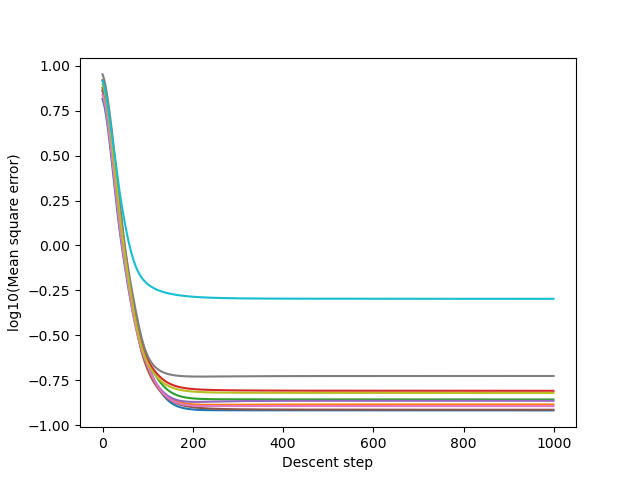

In [7]:
iq3 = ImageQuant2(img=imgs_l109r, roi=rois_l109r, cytbg=cytbg)
iq3.calibrate_membrane(**kwargs_dict)
iq3.plot_losses(log=True)

### Calibration 4 (L50R)

  0%|                                                                                                                     | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                             | 1/1000 [00:00<12:55,  1.29it/s]

  1%|█                                                                                                           | 10/1000 [00:00<01:06, 14.86it/s]

  2%|██▎                                                                                                         | 21/1000 [00:00<00:31, 31.46it/s]

  3%|███▍                                                                                                        | 32/1000 [00:01<00:20, 46.95it/s]

  4%|████▋                                                                                                       | 43/1000 [00:01<00:15, 60.56it/s]

  5%|█████▊                                                                                                      | 54/1000 [00:01<00:13, 72.28it/s]

  7%|███████▏                                                                                                    | 66/1000 [00:01<00:11, 80.97it/s]

  8%|████████▎                                                                                                   | 77/1000 [00:01<00:11, 83.17it/s]

  9%|█████████▍                                                                                                  | 87/1000 [00:01<00:11, 82.45it/s]

 10%|██████████▍                                                                                                 | 97/1000 [00:01<00:10, 82.38it/s]

 11%|███████████▎                                                                                               | 106/1000 [00:01<00:11, 75.35it/s]

 12%|████████████▎                                                                                              | 115/1000 [00:02<00:11, 74.30it/s]

 12%|█████████████▍                                                                                             | 125/1000 [00:02<00:10, 79.80it/s]

 13%|██████████████▎                                                                                            | 134/1000 [00:02<00:10, 81.57it/s]

 14%|███████████████▎                                                                                           | 143/1000 [00:02<00:10, 83.53it/s]

 15%|████████████████▎                                                                                          | 152/1000 [00:02<00:10, 83.23it/s]

 16%|█████████████████▏                                                                                         | 161/1000 [00:02<00:10, 82.91it/s]

 17%|██████████████████▏                                                                                        | 170/1000 [00:02<00:10, 77.72it/s]

 18%|███████████████████                                                                                        | 178/1000 [00:02<00:11, 71.88it/s]

 19%|████████████████████                                                                                       | 188/1000 [00:02<00:10, 78.90it/s]

 20%|█████████████████████▍                                                                                     | 200/1000 [00:03<00:08, 89.90it/s]

 21%|██████████████████████▋                                                                                   | 214/1000 [00:03<00:07, 101.94it/s]

 23%|████████████████████████▎                                                                                 | 229/1000 [00:03<00:06, 114.27it/s]

 24%|█████████████████████████▌                                                                                | 241/1000 [00:03<00:06, 115.07it/s]

 25%|██████████████████████████▊                                                                               | 253/1000 [00:03<00:06, 111.94it/s]

 26%|████████████████████████████▎                                                                              | 265/1000 [00:03<00:07, 99.55it/s]

 28%|█████████████████████████████▌                                                                             | 276/1000 [00:03<00:08, 81.07it/s]

 28%|██████████████████████████████▍                                                                            | 285/1000 [00:03<00:09, 74.11it/s]

 29%|███████████████████████████████▎                                                                           | 293/1000 [00:04<00:10, 66.89it/s]

 30%|████████████████████████████████▏                                                                          | 301/1000 [00:04<00:10, 68.61it/s]

 31%|█████████████████████████████████                                                                          | 309/1000 [00:04<00:10, 68.04it/s]

 32%|█████████████████████████████████▉                                                                         | 317/1000 [00:04<00:10, 66.02it/s]

 33%|██████████████████████████████████▉                                                                        | 326/1000 [00:04<00:09, 70.74it/s]

 33%|███████████████████████████████████▋                                                                       | 334/1000 [00:04<00:09, 71.08it/s]

 34%|████████████████████████████████████▌                                                                      | 342/1000 [00:04<00:09, 71.79it/s]

 35%|█████████████████████████████████████▍                                                                     | 350/1000 [00:04<00:08, 72.59it/s]

 36%|██████████████████████████████████████▍                                                                    | 359/1000 [00:05<00:08, 73.40it/s]

 37%|███████████████████████████████████████▎                                                                   | 367/1000 [00:05<00:09, 67.03it/s]

 37%|████████████████████████████████████████                                                                   | 374/1000 [00:05<00:09, 64.36it/s]

 38%|████████████████████████████████████████▊                                                                  | 381/1000 [00:05<00:12, 48.86it/s]

 39%|█████████████████████████████████████████▍                                                                 | 387/1000 [00:05<00:13, 47.04it/s]

 39%|██████████████████████████████████████████                                                                 | 393/1000 [00:05<00:12, 48.08it/s]

 40%|██████████████████████████████████████████▋                                                                | 399/1000 [00:06<00:16, 35.52it/s]

 41%|███████████████████████████████████████████▋                                                               | 408/1000 [00:06<00:13, 45.32it/s]

 42%|████████████████████████████████████████████▋                                                              | 418/1000 [00:06<00:10, 56.33it/s]

 43%|█████████████████████████████████████████████▋                                                             | 427/1000 [00:06<00:08, 63.72it/s]

 44%|██████████████████████████████████████████████▌                                                            | 435/1000 [00:06<00:08, 67.46it/s]

 44%|███████████████████████████████████████████████▌                                                           | 445/1000 [00:06<00:07, 74.64it/s]

 45%|████████████████████████████████████████████████▌                                                          | 454/1000 [00:06<00:07, 77.51it/s]

 46%|█████████████████████████████████████████████████▊                                                         | 465/1000 [00:06<00:06, 85.55it/s]

 48%|██████████████████████████████████████████████████▉                                                       | 480/1000 [00:06<00:05, 102.26it/s]

 50%|████████████████████████████████████████████████████▍                                                     | 495/1000 [00:07<00:04, 113.97it/s]

 51%|█████████████████████████████████████████████████████▉                                                    | 509/1000 [00:07<00:04, 120.80it/s]

 52%|███████████████████████████████████████████████████████▍                                                  | 523/1000 [00:07<00:03, 125.00it/s]

 54%|████████████████████████████████████████████████████████▊                                                 | 536/1000 [00:07<00:03, 125.51it/s]

 55%|██████████████████████████████████████████████████████████▏                                               | 549/1000 [00:07<00:03, 124.89it/s]

 56%|███████████████████████████████████████████████████████████▋                                              | 563/1000 [00:07<00:03, 128.61it/s]

 58%|█████████████████████████████████████████████████████████████                                             | 576/1000 [00:07<00:03, 127.06it/s]

 59%|██████████████████████████████████████████████████████████████▌                                           | 590/1000 [00:07<00:03, 128.17it/s]

 60%|████████████████████████████████████████████████████████████████                                          | 604/1000 [00:07<00:03, 129.47it/s]

 62%|█████████████████████████████████████████████████████████████████▌                                        | 618/1000 [00:07<00:02, 132.24it/s]

 63%|██████████████████████████████████████████████████████████████████▉                                       | 632/1000 [00:08<00:02, 133.65it/s]

 65%|████████████████████████████████████████████████████████████████████▌                                     | 647/1000 [00:08<00:02, 137.90it/s]

 66%|██████████████████████████████████████████████████████████████████████                                    | 661/1000 [00:08<00:02, 125.58it/s]

 68%|███████████████████████████████████████████████████████████████████████▌                                  | 675/1000 [00:08<00:02, 126.55it/s]

 69%|████████████████████████████████████████████████████████████████████████▉                                 | 688/1000 [00:08<00:02, 122.14it/s]

 70%|██████████████████████████████████████████████████████████████████████████▎                               | 701/1000 [00:08<00:02, 118.43it/s]

 71%|███████████████████████████████████████████████████████████████████████████▌                              | 713/1000 [00:08<00:02, 111.44it/s]

 72%|████████████████████████████████████████████████████████████████████████████▊                             | 725/1000 [00:08<00:02, 112.56it/s]

 74%|██████████████████████████████████████████████████████████████████████████████                            | 737/1000 [00:09<00:02, 106.93it/s]

 75%|███████████████████████████████████████████████████████████████████████████████▎                          | 748/1000 [00:09<00:02, 103.32it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████▏                         | 759/1000 [00:09<00:02, 99.30it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████▌                        | 770/1000 [00:09<00:02, 101.15it/s]

 78%|██████████████████████████████████████████████████████████████████████████████████▊                       | 781/1000 [00:09<00:02, 102.72it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████                      | 793/1000 [00:09<00:01, 106.04it/s]

 81%|█████████████████████████████████████████████████████████████████████████████████████▍                    | 806/1000 [00:09<00:01, 109.74it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████▊                   | 819/1000 [00:09<00:01, 113.89it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████                  | 831/1000 [00:09<00:01, 112.40it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████▎                | 843/1000 [00:09<00:01, 113.89it/s]

 86%|██████████████████████████████████████████████████████████████████████████████████████████▋               | 855/1000 [00:10<00:01, 110.79it/s]

 87%|███████████████████████████████████████████████████████████████████████████████████████████▉              | 867/1000 [00:10<00:01, 107.81it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████▍            | 881/1000 [00:10<00:01, 115.24it/s]

 89%|██████████████████████████████████████████████████████████████████████████████████████████████▊           | 894/1000 [00:10<00:00, 119.33it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████▏         | 907/1000 [00:10<00:00, 118.02it/s]

 92%|█████████████████████████████████████████████████████████████████████████████████████████████████▍        | 919/1000 [00:10<00:00, 105.04it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████▌       | 930/1000 [00:10<00:00, 93.97it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████▌      | 940/1000 [00:10<00:00, 89.89it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 950/1000 [00:11<00:00, 88.39it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋    | 960/1000 [00:11<00:00, 85.74it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 969/1000 [00:11<00:00, 80.10it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▋  | 978/1000 [00:11<00:00, 68.69it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 988/1000 [00:11<00:00, 75.40it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 996/1000 [00:11<00:00, 56.24it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 83.73it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

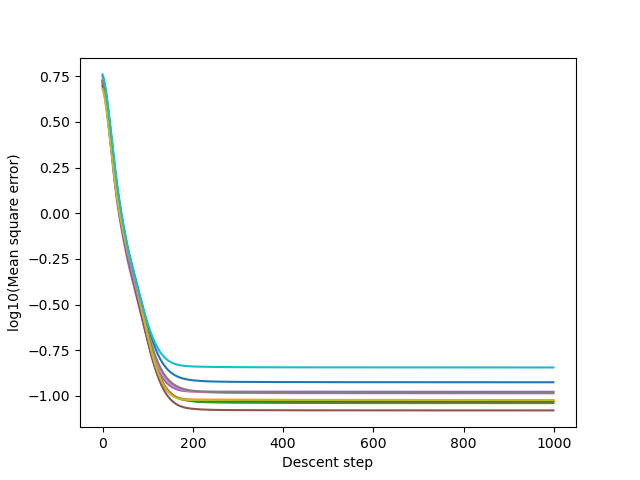

In [8]:
iq4 = ImageQuant2(img=imgs_l50r, roi=rois_l50r, cytbg=cytbg)
iq4.calibrate_membrane(**kwargs_dict)
iq4.plot_losses(log=True)

### Calibration 5 (WT single copy)

  0%|                                                                                                                     | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                             | 1/1000 [00:00<08:48,  1.89it/s]

  2%|█▌                                                                                                          | 15/1000 [00:00<00:31, 30.94it/s]

  3%|███                                                                                                         | 28/1000 [00:00<00:18, 53.42it/s]

  4%|████▏                                                                                                       | 39/1000 [00:00<00:15, 60.99it/s]

  5%|█████▍                                                                                                      | 50/1000 [00:00<00:13, 72.45it/s]

  6%|██████▌                                                                                                     | 61/1000 [00:01<00:11, 81.53it/s]

  7%|███████▊                                                                                                    | 72/1000 [00:01<00:10, 85.39it/s]

  8%|████████▊                                                                                                   | 82/1000 [00:01<00:11, 83.10it/s]

  9%|█████████▉                                                                                                  | 92/1000 [00:01<00:10, 86.31it/s]

 10%|███████████▏                                                                                               | 105/1000 [00:01<00:09, 97.41it/s]

 12%|████████████▍                                                                                             | 117/1000 [00:01<00:08, 102.06it/s]

 13%|█████████████▋                                                                                            | 129/1000 [00:01<00:08, 104.72it/s]

 14%|██████████████▉                                                                                            | 140/1000 [00:01<00:10, 82.51it/s]

 15%|████████████████▎                                                                                          | 152/1000 [00:02<00:09, 90.28it/s]

 17%|█████████████████▋                                                                                        | 167/1000 [00:02<00:08, 103.78it/s]

 18%|███████████████████                                                                                       | 180/1000 [00:02<00:07, 110.40it/s]

 20%|████████████████████▋                                                                                     | 195/1000 [00:02<00:06, 119.19it/s]

 21%|██████████████████████▎                                                                                   | 210/1000 [00:02<00:06, 127.01it/s]

 22%|███████████████████████▋                                                                                  | 224/1000 [00:02<00:05, 129.45it/s]

 24%|█████████████████████████▏                                                                                | 238/1000 [00:02<00:05, 132.33it/s]

 25%|██████████████████████████▊                                                                               | 253/1000 [00:02<00:05, 134.75it/s]

 27%|████████████████████████████▍                                                                             | 268/1000 [00:02<00:05, 136.36it/s]

 28%|█████████████████████████████▉                                                                            | 282/1000 [00:02<00:05, 136.02it/s]

 30%|███████████████████████████████▍                                                                          | 297/1000 [00:03<00:05, 139.15it/s]

 31%|█████████████████████████████████▎                                                                        | 314/1000 [00:03<00:04, 145.91it/s]

 33%|██████████████████████████████████▊                                                                       | 329/1000 [00:03<00:04, 144.07it/s]

 34%|████████████████████████████████████▍                                                                     | 344/1000 [00:03<00:04, 141.07it/s]

 36%|██████████████████████████████████████                                                                    | 359/1000 [00:03<00:04, 138.59it/s]

 38%|███████████████████████████████████████▊                                                                  | 375/1000 [00:03<00:04, 144.14it/s]

 39%|█████████████████████████████████████████▎                                                                | 390/1000 [00:03<00:04, 145.24it/s]

 41%|███████████████████████████████████████████                                                               | 406/1000 [00:03<00:04, 147.28it/s]

 42%|████████████████████████████████████████████▋                                                             | 421/1000 [00:03<00:03, 145.60it/s]

 44%|██████████████████████████████████████████████▏                                                           | 436/1000 [00:04<00:03, 144.11it/s]

 45%|████████████████████████████████████████████████                                                          | 453/1000 [00:04<00:03, 150.03it/s]

 47%|█████████████████████████████████████████████████▋                                                        | 469/1000 [00:04<00:03, 148.76it/s]

 48%|███████████████████████████████████████████████████▍                                                      | 485/1000 [00:04<00:03, 150.23it/s]

 50%|█████████████████████████████████████████████████████                                                     | 501/1000 [00:04<00:03, 151.03it/s]

 52%|██████████████████████████████████████████████████████▊                                                   | 517/1000 [00:04<00:03, 148.51it/s]

 53%|████████████████████████████████████████████████████████▍                                                 | 532/1000 [00:04<00:03, 145.50it/s]

 55%|█████████████████████████████████████████████████████████▉                                                | 547/1000 [00:04<00:03, 145.98it/s]

 56%|███████████████████████████████████████████████████████████▌                                              | 562/1000 [00:04<00:02, 146.23it/s]

 58%|█████████████████████████████████████████████████████████████▏                                            | 577/1000 [00:05<00:02, 143.26it/s]

 59%|██████████████████████████████████████████████████████████████▊                                           | 593/1000 [00:05<00:02, 147.29it/s]

 61%|████████████████████████████████████████████████████████████████▌                                         | 609/1000 [00:05<00:02, 150.26it/s]

 62%|██████████████████████████████████████████████████████████████████▎                                       | 625/1000 [00:05<00:02, 152.44it/s]

 64%|███████████████████████████████████████████████████████████████████▉                                      | 641/1000 [00:05<00:02, 152.16it/s]

 66%|█████████████████████████████████████████████████████████████████████▋                                    | 657/1000 [00:05<00:02, 152.92it/s]

 67%|███████████████████████████████████████████████████████████████████████▎                                  | 673/1000 [00:05<00:02, 151.91it/s]

 69%|█████████████████████████████████████████████████████████████████████████                                 | 689/1000 [00:05<00:02, 151.53it/s]

 70%|██████████████████████████████████████████████████████████████████████████▋                               | 705/1000 [00:05<00:01, 150.70it/s]

 72%|████████████████████████████████████████████████████████████████████████████▍                             | 721/1000 [00:05<00:01, 152.52it/s]

 74%|██████████████████████████████████████████████████████████████████████████████                            | 737/1000 [00:06<00:01, 154.36it/s]

 75%|███████████████████████████████████████████████████████████████████████████████▊                          | 753/1000 [00:06<00:01, 153.93it/s]

 77%|█████████████████████████████████████████████████████████████████████████████████▌                        | 769/1000 [00:06<00:01, 151.24it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████▏                      | 785/1000 [00:06<00:01, 153.26it/s]

 80%|████████████████████████████████████████████████████████████████████████████████████▉                     | 801/1000 [00:06<00:01, 154.55it/s]

 82%|██████████████████████████████████████████████████████████████████████████████████████▌                   | 817/1000 [00:06<00:01, 153.57it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████▎                 | 833/1000 [00:06<00:01, 153.90it/s]

 85%|█████████████████████████████████████████████████████████████████████████████████████████▉                | 849/1000 [00:06<00:00, 154.29it/s]

 86%|███████████████████████████████████████████████████████████████████████████████████████████▋              | 865/1000 [00:06<00:00, 154.44it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████▍            | 881/1000 [00:06<00:00, 155.17it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████           | 897/1000 [00:07<00:00, 146.08it/s]

 91%|████████████████████████████████████████████████████████████████████████████████████████████████▋         | 912/1000 [00:07<00:00, 145.86it/s]

 93%|██████████████████████████████████████████████████████████████████████████████████████████████████▎       | 928/1000 [00:07<00:00, 147.74it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████      | 944/1000 [00:07<00:00, 149.44it/s]

 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊    | 960/1000 [00:07<00:00, 151.22it/s]

 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 976/1000 [00:07<00:00, 152.38it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 993/1000 [00:07<00:00, 154.31it/s]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:07<00:00, 128.53it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

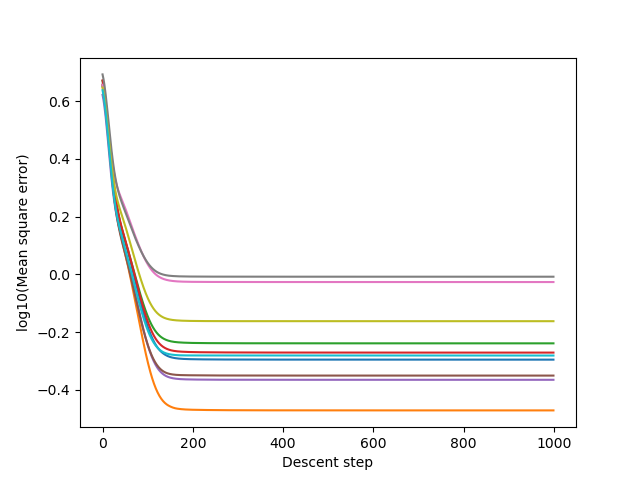

In [9]:
iq5 = ImageQuant2(img=imgs_het, roi=rois_het, cytbg=cytbg)
iq5.calibrate_membrane(**kwargs_dict)
iq5.plot_losses(log=True)

### Calibration 6 (Full dataset)

  0%|                                                                                                                     | 0/1000 [00:00<?, ?it/s]

  0%|                                                                                                             | 1/1000 [00:00<09:48,  1.70it/s]

  1%|▊                                                                                                            | 7/1000 [00:00<01:17, 12.88it/s]

  1%|█▍                                                                                                          | 13/1000 [00:00<00:44, 22.16it/s]

  2%|██                                                                                                          | 19/1000 [00:00<00:32, 29.82it/s]

  2%|██▋                                                                                                         | 25/1000 [00:01<00:27, 35.69it/s]

  3%|███▏                                                                                                        | 30/1000 [00:01<00:24, 39.20it/s]

  4%|███▉                                                                                                        | 36/1000 [00:01<00:22, 42.56it/s]

  4%|████▌                                                                                                       | 42/1000 [00:01<00:21, 45.45it/s]

  5%|█████▏                                                                                                      | 48/1000 [00:01<00:19, 47.74it/s]

  5%|█████▊                                                                                                      | 54/1000 [00:01<00:19, 49.22it/s]

  6%|██████▍                                                                                                     | 60/1000 [00:01<00:18, 51.91it/s]

  7%|███████▏                                                                                                    | 66/1000 [00:01<00:17, 51.93it/s]

  7%|███████▉                                                                                                    | 73/1000 [00:01<00:16, 54.96it/s]

  8%|████████▌                                                                                                   | 79/1000 [00:02<00:16, 55.27it/s]

  9%|█████████▎                                                                                                  | 86/1000 [00:02<00:15, 57.28it/s]

  9%|█████████▉                                                                                                  | 92/1000 [00:02<00:16, 55.61it/s]

 10%|██████████▌                                                                                                 | 98/1000 [00:02<00:16, 54.90it/s]

 10%|███████████▏                                                                                               | 104/1000 [00:02<00:16, 54.41it/s]

 11%|███████████▊                                                                                               | 110/1000 [00:02<00:16, 54.99it/s]

 12%|████████████▍                                                                                              | 116/1000 [00:02<00:16, 54.80it/s]

 12%|█████████████                                                                                              | 122/1000 [00:02<00:16, 54.31it/s]

 13%|█████████████▋                                                                                             | 128/1000 [00:02<00:16, 53.42it/s]

 13%|██████████████▎                                                                                            | 134/1000 [00:03<00:16, 52.78it/s]

 14%|██████████████▉                                                                                            | 140/1000 [00:03<00:16, 52.67it/s]

 15%|███████████████▌                                                                                           | 146/1000 [00:03<00:16, 52.75it/s]

 15%|████████████████▎                                                                                          | 152/1000 [00:03<00:16, 52.44it/s]

 16%|████████████████▉                                                                                          | 158/1000 [00:03<00:16, 52.49it/s]

 16%|█████████████████▌                                                                                         | 164/1000 [00:03<00:15, 52.82it/s]

 17%|██████████████████▏                                                                                        | 170/1000 [00:03<00:15, 52.82it/s]

 18%|██████████████████▊                                                                                        | 176/1000 [00:03<00:15, 52.31it/s]

 18%|███████████████████▌                                                                                       | 183/1000 [00:03<00:14, 55.49it/s]

 19%|████████████████████▏                                                                                      | 189/1000 [00:04<00:14, 54.12it/s]

 20%|████████████████████▊                                                                                      | 195/1000 [00:04<00:15, 52.77it/s]

 20%|█████████████████████▌                                                                                     | 201/1000 [00:04<00:14, 54.13it/s]

 21%|██████████████████████▏                                                                                    | 207/1000 [00:04<00:14, 53.23it/s]

 21%|██████████████████████▊                                                                                    | 213/1000 [00:04<00:15, 52.05it/s]

 22%|███████████████████████▍                                                                                   | 219/1000 [00:04<00:15, 52.04it/s]

 22%|████████████████████████                                                                                   | 225/1000 [00:04<00:14, 52.13it/s]

 23%|████████████████████████▋                                                                                  | 231/1000 [00:04<00:14, 51.50it/s]

 24%|█████████████████████████▎                                                                                 | 237/1000 [00:05<00:14, 51.81it/s]

 24%|██████████████████████████                                                                                 | 243/1000 [00:05<00:14, 52.37it/s]

 25%|██████████████████████████▋                                                                                | 249/1000 [00:05<00:14, 52.02it/s]

 26%|███████████████████████████▎                                                                               | 255/1000 [00:05<00:14, 51.59it/s]

 26%|███████████████████████████▉                                                                               | 261/1000 [00:05<00:14, 51.46it/s]

 27%|████████████████████████████▌                                                                              | 267/1000 [00:05<00:14, 50.30it/s]

 27%|█████████████████████████████▏                                                                             | 273/1000 [00:05<00:14, 51.12it/s]

 28%|█████████████████████████████▊                                                                             | 279/1000 [00:05<00:13, 52.45it/s]

 29%|██████████████████████████████▌                                                                            | 286/1000 [00:05<00:13, 54.38it/s]

 29%|███████████████████████████████▏                                                                           | 292/1000 [00:06<00:13, 52.61it/s]

 30%|███████████████████████████████▉                                                                           | 298/1000 [00:06<00:12, 54.08it/s]

 30%|████████████████████████████████▌                                                                          | 304/1000 [00:06<00:12, 54.98it/s]

 31%|█████████████████████████████████▏                                                                         | 310/1000 [00:06<00:12, 55.17it/s]

 32%|█████████████████████████████████▊                                                                         | 316/1000 [00:06<00:12, 53.46it/s]

 32%|██████████████████████████████████▍                                                                        | 322/1000 [00:06<00:13, 50.44it/s]

 33%|███████████████████████████████████                                                                        | 328/1000 [00:06<00:13, 50.84it/s]

 34%|███████████████████████████████████▊                                                                       | 335/1000 [00:06<00:12, 54.63it/s]

 34%|████████████████████████████████████▍                                                                      | 341/1000 [00:06<00:12, 54.74it/s]

 35%|█████████████████████████████████████▏                                                                     | 347/1000 [00:07<00:12, 54.37it/s]

 35%|█████████████████████████████████████▊                                                                     | 353/1000 [00:07<00:12, 52.90it/s]

 36%|██████████████████████████████████████▍                                                                    | 359/1000 [00:07<00:12, 52.33it/s]

 36%|███████████████████████████████████████                                                                    | 365/1000 [00:07<00:12, 51.18it/s]

 37%|███████████████████████████████████████▋                                                                   | 371/1000 [00:07<00:12, 50.78it/s]

 38%|████████████████████████████████████████▎                                                                  | 377/1000 [00:07<00:11, 51.94it/s]

 38%|████████████████████████████████████████▉                                                                  | 383/1000 [00:07<00:11, 51.96it/s]

 39%|█████████████████████████████████████████▌                                                                 | 389/1000 [00:07<00:11, 50.98it/s]

 40%|██████████████████████████████████████████▎                                                                | 395/1000 [00:08<00:11, 50.53it/s]

 40%|██████████████████████████████████████████▉                                                                | 401/1000 [00:08<00:11, 50.87it/s]

 41%|███████████████████████████████████████████▌                                                               | 407/1000 [00:08<00:12, 49.08it/s]

 41%|████████████████████████████████████████████▏                                                              | 413/1000 [00:08<00:11, 50.09it/s]

 42%|████████████████████████████████████████████▊                                                              | 419/1000 [00:08<00:11, 49.52it/s]

 42%|█████████████████████████████████████████████▍                                                             | 425/1000 [00:08<00:11, 50.32it/s]

 43%|██████████████████████████████████████████████                                                             | 431/1000 [00:08<00:11, 51.47it/s]

 44%|██████████████████████████████████████████████▊                                                            | 437/1000 [00:08<00:11, 50.86it/s]

 44%|███████████████████████████████████████████████▍                                                           | 443/1000 [00:08<00:11, 50.08it/s]

 45%|████████████████████████████████████████████████                                                           | 449/1000 [00:09<00:11, 49.58it/s]

 46%|████████████████████████████████████████████████▋                                                          | 455/1000 [00:09<00:10, 50.49it/s]

 46%|█████████████████████████████████████████████████▎                                                         | 461/1000 [00:09<00:10, 52.77it/s]

 47%|█████████████████████████████████████████████████▉                                                         | 467/1000 [00:09<00:09, 54.30it/s]

 47%|██████████████████████████████████████████████████▌                                                        | 473/1000 [00:09<00:09, 53.17it/s]

 48%|███████████████████████████████████████████████████▎                                                       | 479/1000 [00:09<00:09, 53.06it/s]

 48%|███████████████████████████████████████████████████▉                                                       | 485/1000 [00:09<00:09, 53.37it/s]

 49%|████████████████████████████████████████████████████▌                                                      | 491/1000 [00:09<00:09, 54.07it/s]

 50%|█████████████████████████████████████████████████████▎                                                     | 498/1000 [00:09<00:08, 56.95it/s]

 50%|█████████████████████████████████████████████████████▉                                                     | 504/1000 [00:10<00:09, 53.17it/s]

 51%|██████████████████████████████████████████████████████▌                                                    | 510/1000 [00:10<00:09, 51.32it/s]

 52%|███████████████████████████████████████████████████████▏                                                   | 516/1000 [00:10<00:09, 48.52it/s]

 52%|███████████████████████████████████████████████████████▋                                                   | 521/1000 [00:10<00:10, 45.18it/s]

 53%|████████████████████████████████████████████████████████▎                                                  | 526/1000 [00:10<00:11, 39.91it/s]

 53%|████████████████████████████████████████████████████████▊                                                  | 531/1000 [00:10<00:12, 37.58it/s]

 54%|█████████████████████████████████████████████████████████▎                                                 | 536/1000 [00:10<00:11, 39.95it/s]

 54%|█████████████████████████████████████████████████████████▉                                                 | 542/1000 [00:11<00:10, 43.58it/s]

 55%|██████████████████████████████████████████████████████████▋                                                | 548/1000 [00:11<00:09, 46.21it/s]

 55%|███████████████████████████████████████████████████████████▎                                               | 554/1000 [00:11<00:09, 48.48it/s]

 56%|███████████████████████████████████████████████████████████▉                                               | 560/1000 [00:11<00:08, 49.32it/s]

 57%|████████████████████████████████████████████████████████████▌                                              | 566/1000 [00:11<00:08, 50.63it/s]

 57%|█████████████████████████████████████████████████████████████▏                                             | 572/1000 [00:11<00:08, 51.58it/s]

 58%|█████████████████████████████████████████████████████████████▊                                             | 578/1000 [00:11<00:07, 53.78it/s]

 58%|██████████████████████████████████████████████████████████████▍                                            | 584/1000 [00:11<00:07, 55.02it/s]

 59%|███████████████████████████████████████████████████████████████▏                                           | 590/1000 [00:11<00:07, 52.06it/s]

 60%|███████████████████████████████████████████████████████████████▊                                           | 596/1000 [00:12<00:08, 50.46it/s]

 60%|████████████████████████████████████████████████████████████████▍                                          | 602/1000 [00:12<00:08, 48.82it/s]

 61%|████████████████████████████████████████████████████████████████▉                                          | 607/1000 [00:12<00:08, 48.66it/s]

 61%|█████████████████████████████████████████████████████████████████▌                                         | 613/1000 [00:12<00:07, 49.50it/s]

 62%|██████████████████████████████████████████████████████████████████▎                                        | 620/1000 [00:12<00:07, 53.87it/s]

 63%|██████████████████████████████████████████████████████████████████▉                                        | 626/1000 [00:12<00:06, 54.13it/s]

 63%|███████████████████████████████████████████████████████████████████▌                                       | 632/1000 [00:12<00:06, 53.29it/s]

 64%|████████████████████████████████████████████████████████████████████▎                                      | 638/1000 [00:12<00:06, 53.45it/s]

 64%|████████████████████████████████████████████████████████████████████▉                                      | 644/1000 [00:12<00:06, 53.81it/s]

 65%|█████████████████████████████████████████████████████████████████████▌                                     | 650/1000 [00:13<00:06, 53.97it/s]

 66%|██████████████████████████████████████████████████████████████████████▏                                    | 656/1000 [00:13<00:06, 53.29it/s]

 66%|██████████████████████████████████████████████████████████████████████▊                                    | 662/1000 [00:13<00:06, 54.25it/s]

 67%|███████████████████████████████████████████████████████████████████████▍                                   | 668/1000 [00:13<00:06, 54.02it/s]

 67%|████████████████████████████████████████████████████████████████████████                                   | 674/1000 [00:13<00:06, 53.18it/s]

 68%|████████████████████████████████████████████████████████████████████████▊                                  | 680/1000 [00:13<00:06, 52.97it/s]

 69%|█████████████████████████████████████████████████████████████████████████▌                                 | 687/1000 [00:13<00:05, 56.07it/s]

 69%|██████████████████████████████████████████████████████████████████████████▎                                | 694/1000 [00:13<00:05, 58.29it/s]

 70%|██████████████████████████████████████████████████████████████████████████▉                                | 700/1000 [00:14<00:05, 55.60it/s]

 71%|███████████████████████████████████████████████████████████████████████████▌                               | 706/1000 [00:14<00:05, 55.17it/s]

 71%|████████████████████████████████████████████████████████████████████████████▏                              | 712/1000 [00:14<00:05, 54.38it/s]

 72%|████████████████████████████████████████████████████████████████████████████▊                              | 718/1000 [00:14<00:05, 54.54it/s]

 72%|█████████████████████████████████████████████████████████████████████████████▌                             | 725/1000 [00:14<00:04, 56.55it/s]

 73%|██████████████████████████████████████████████████████████████████████████████▏                            | 731/1000 [00:14<00:04, 56.71it/s]

 74%|██████████████████████████████████████████████████████████████████████████████▊                            | 737/1000 [00:14<00:04, 55.46it/s]

 74%|███████████████████████████████████████████████████████████████████████████████▌                           | 743/1000 [00:14<00:04, 55.07it/s]

 75%|████████████████████████████████████████████████████████████████████████████████▏                          | 749/1000 [00:14<00:04, 54.53it/s]

 76%|████████████████████████████████████████████████████████████████████████████████▉                          | 756/1000 [00:15<00:04, 56.40it/s]

 76%|█████████████████████████████████████████████████████████████████████████████████▌                         | 762/1000 [00:15<00:04, 55.45it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████▏                        | 768/1000 [00:15<00:04, 54.88it/s]

 77%|██████████████████████████████████████████████████████████████████████████████████▊                        | 774/1000 [00:15<00:04, 54.34it/s]

 78%|███████████████████████████████████████████████████████████████████████████████████▍                       | 780/1000 [00:15<00:04, 54.26it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████                       | 786/1000 [00:15<00:03, 53.85it/s]

 79%|████████████████████████████████████████████████████████████████████████████████████▋                      | 792/1000 [00:15<00:03, 53.79it/s]

 80%|█████████████████████████████████████████████████████████████████████████████████████▍                     | 798/1000 [00:15<00:03, 51.94it/s]

 80%|██████████████████████████████████████████████████████████████████████████████████████                     | 804/1000 [00:15<00:03, 51.38it/s]

 81%|██████████████████████████████████████████████████████████████████████████████████████▋                    | 810/1000 [00:16<00:03, 51.31it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████▎                   | 816/1000 [00:16<00:03, 51.80it/s]

 82%|███████████████████████████████████████████████████████████████████████████████████████▉                   | 822/1000 [00:16<00:03, 52.64it/s]

 83%|████████████████████████████████████████████████████████████████████████████████████████▌                  | 828/1000 [00:16<00:03, 52.71it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████▎                 | 835/1000 [00:16<00:02, 56.37it/s]

 84%|█████████████████████████████████████████████████████████████████████████████████████████▉                 | 841/1000 [00:16<00:02, 55.68it/s]

 85%|██████████████████████████████████████████████████████████████████████████████████████████▋                | 848/1000 [00:16<00:02, 58.51it/s]

 85%|███████████████████████████████████████████████████████████████████████████████████████████▍               | 854/1000 [00:16<00:02, 56.78it/s]

 86%|████████████████████████████████████████████████████████████████████████████████████████████               | 860/1000 [00:16<00:02, 55.76it/s]

 87%|████████████████████████████████████████████████████████████████████████████████████████████▋              | 866/1000 [00:17<00:02, 55.32it/s]

 87%|█████████████████████████████████████████████████████████████████████████████████████████████▎             | 872/1000 [00:17<00:02, 55.70it/s]

 88%|█████████████████████████████████████████████████████████████████████████████████████████████▉             | 878/1000 [00:17<00:02, 55.32it/s]

 88%|██████████████████████████████████████████████████████████████████████████████████████████████▌            | 884/1000 [00:17<00:02, 54.95it/s]

 89%|███████████████████████████████████████████████████████████████████████████████████████████████▏           | 890/1000 [00:17<00:02, 53.01it/s]

 90%|███████████████████████████████████████████████████████████████████████████████████████████████▊           | 896/1000 [00:17<00:01, 52.78it/s]

 90%|████████████████████████████████████████████████████████████████████████████████████████████████▌          | 902/1000 [00:17<00:01, 52.22it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████▏         | 908/1000 [00:17<00:01, 51.48it/s]

 91%|█████████████████████████████████████████████████████████████████████████████████████████████████▊         | 914/1000 [00:17<00:01, 52.69it/s]

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████▍        | 920/1000 [00:18<00:01, 52.75it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████▏       | 927/1000 [00:18<00:01, 56.35it/s]

 93%|███████████████████████████████████████████████████████████████████████████████████████████████████▊       | 933/1000 [00:18<00:01, 56.96it/s]

 94%|████████████████████████████████████████████████████████████████████████████████████████████████████▍      | 939/1000 [00:18<00:01, 56.39it/s]

 94%|█████████████████████████████████████████████████████████████████████████████████████████████████████      | 945/1000 [00:18<00:00, 55.71it/s]

 95%|█████████████████████████████████████████████████████████████████████████████████████████████████████▊     | 951/1000 [00:18<00:00, 55.23it/s]

 96%|██████████████████████████████████████████████████████████████████████████████████████████████████████▍    | 957/1000 [00:18<00:00, 55.10it/s]

 96%|███████████████████████████████████████████████████████████████████████████████████████████████████████▏   | 964/1000 [00:18<00:00, 56.94it/s]

 97%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊   | 970/1000 [00:18<00:00, 56.03it/s]

 98%|████████████████████████████████████████████████████████████████████████████████████████████████████████▍  | 976/1000 [00:19<00:00, 56.28it/s]

 98%|█████████████████████████████████████████████████████████████████████████████████████████████████████████  | 982/1000 [00:19<00:00, 56.06it/s]

 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 988/1000 [00:19<00:00, 55.35it/s]

 99%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▎| 994/1000 [00:19<00:00, 54.65it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 54.67it/s]

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.29it/s]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

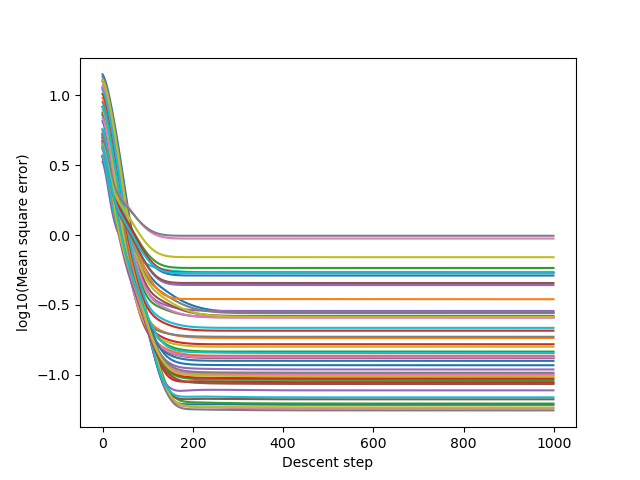

In [10]:
iq6 = ImageQuant2(img=imgs_wt + imgs_c56s + imgs_l109r + imgs_l50r + imgs_het, 
                  roi=rois_wt + rois_c56s + rois_l109r + rois_l50r + rois_het, cytbg=cytbg)
iq6.calibrate_membrane(**kwargs_dict)
iq6.plot_losses(log=True)

### View results

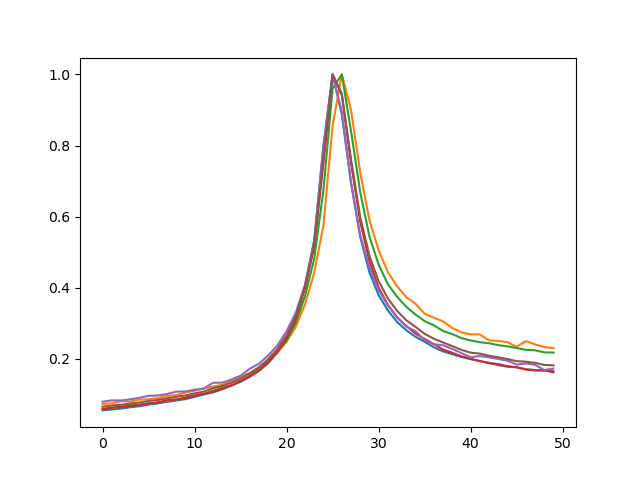

In [11]:
fig, ax = plt.subplots()
ax.plot(iq1.membg.T / np.max(iq1.membg))
ax.plot(iq2.membg.T / np.max(iq2.membg))
ax.plot(iq3.membg.T / np.max(iq3.membg))
ax.plot(iq4.membg.T / np.max(iq4.membg))
ax.plot(iq5.membg.T / np.max(iq5.membg))
ax.plot(iq6.membg.T / np.max(iq6.membg))

In [12]:
# Save
np.savetxt('../../data/calibration_mem1.txt', iq1.membg)
np.savetxt('../../data/calibration_mem2.txt', iq2.membg)
np.savetxt('../../data/calibration_mem3.txt', iq3.membg)
np.savetxt('../../data/calibration_mem4.txt', iq4.membg)
np.savetxt('../../data/calibration_mem5.txt', iq5.membg)
np.savetxt('../../data/calibration_mem6.txt', iq6.membg)